# Data Understanding and Preprocessing:

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm,t
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd


from statsmodels.stats import proportion

import matplotlib
from matplotlib import pyplot as plt
import pylab 
from pylab import plot,show,legend,title,xlabel,ylabel

import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Load and inspect the dataset.
data=pd.read_csv(r"C:\Users\UTKARSHA LOKHANDE\Downloads\data (1).csv",encoding='latin-1')

In [4]:
data.head(20)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [5]:
data.shape

(6819, 96)

In [6]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan Â¥)',
       ' Operating Profit Per Share (Yuan Â¥)',
       ' Per Share Net profit before tax (Yuan Â¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Pro

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
data_bank=data['Bankrupt?']

In [10]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [11]:
data_bank

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [12]:
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [13]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [14]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

Text(0.5, 1.0, 'count of target varible per category')

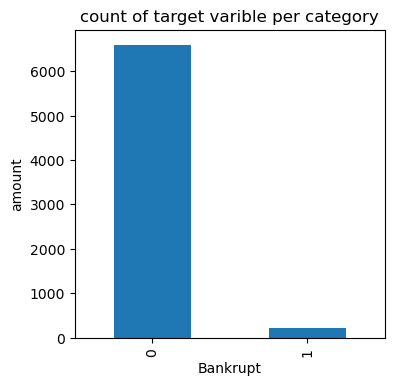

In [15]:
data['Bankrupt?'].value_counts().plot(kind="bar",figsize=(4,4))
plt.xlabel("Bankrupt")
plt.ylabel("amount")
plt.title("count of target varible per category")

In [16]:
def impute_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with bounds
    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound

    return data

# List of columns to impute (excluding 'Bankrupt?')
columns_to_impute = data.columns.difference(['Bankrupt?','Current Liability to Current Assets','Net Income Flag'])

# Apply the imputation function to each column
for column in columns_to_impute:
    data = impute_outliers(data, column)

# Check the counts of 'Bankrupt?' after imputation
print(data['Bankrupt?'].value_counts())

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [17]:
#Check null and duplicates
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6819
 Interest Coverage Ratio (Interest expense to EBIT)         6819
 Net Income Flag                                            6819
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [20]:
{column:len(data[column].unique()) for column in data.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 2967,
 ' ROA(A) before interest and % after tax': 2640,
 ' ROA(B) before interest and depreciation after tax': 2746,
 ' Operating Gross Margin': 3473,
 ' Realized Sales Gross Margin': 3482,
 ' Operating Profit Rate': 2700,
 ' Pre-tax net Interest Rate': 3049,
 ' After-tax net Interest Rate': 2783,
 ' Non-industry income and expenditure/revenue': 1556,
 ' Continuous interest rate (after tax)': 2841,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1471,
 ' Cash flow rate': 4990,
 ' Interest-bearing debt interest rate': 826,
 ' Tax rate (A)': 2369,
 ' Net Value Per Share (B)': 1869,
 ' Net Value Per Share (A)': 1869,
 ' Net Value Per Share (C)': 1865,
 ' Persistent EPS in the Last Four Seasons': 948,
 ' Cash Flow Per Share': 1098,
 ' Revenue Per Share (Yuan Â¥)': 3347,
 ' Operating Profit Per Share (Yuan Â¥)': 889,
 ' Per Share Net profit before tax (Yuan Â¥)': 1101,
 ' Realized Sale

# Exploratory Data Analysis (EDA)

In [21]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505667,0.560507,0.554691,0.607834,0.607812,0.999028,0.797467,0.809378,0.303526,...,0.810070,0.003750,0.623890,0.607833,0.841060,0.279689,0.026846,0.565422,1.0,0.042019
std,0.176710,0.051483,0.050087,0.050277,0.010758,0.010725,0.000120,0.000189,0.000157,0.000124,...,0.027735,0.003805,0.000553,0.010758,0.002057,0.003566,0.000138,0.000627,0.0,0.023671
min,0.000000,0.387973,0.455122,0.442034,0.580240,0.580321,0.998781,0.797096,0.809075,0.303288,...,0.752193,0.000000,0.622838,0.580237,0.836752,0.270187,0.026608,0.564309,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,0.000904,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,0.002085,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,0.005270,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,0.624116,0.669579,0.669348,0.634118,0.633954,0.999282,0.797868,0.809706,0.303764,...,0.871012,0.011819,0.624966,0.634119,0.845720,0.288207,0.027096,0.566574,1.0,0.095380


In [22]:
corr_matrix=data.corr()

In [23]:
corr_matrix

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.239543,-0.239500,-0.241993,-0.140042,-0.139272,-0.193856,-0.238036,-0.239484,-0.214507,...,-0.255797,0.065817,-0.110684,-0.140041,-0.251917,0.246176,-0.129292,-0.110761,NaN,-0.161036
ROA(C) before interest and depreciation before interest,-0.239543,1.000000,0.941564,0.988614,0.471126,0.468962,0.794920,0.823454,0.810364,0.410102,...,0.930357,-0.007035,0.162347,0.471121,0.890314,-0.258969,0.111443,0.099427,NaN,0.185974
ROA(A) before interest and % after tax,-0.239500,0.941564,1.000000,0.952666,0.471641,0.469330,0.796013,0.876436,0.877649,0.505969,...,0.990799,0.000936,0.174670,0.471638,0.952613,-0.254115,0.153120,0.140903,NaN,0.186650
ROA(B) before interest and depreciation after tax,-0.241993,0.988614,0.952666,1.000000,0.481338,0.479152,0.800215,0.829183,0.831419,0.412237,...,0.942100,0.004209,0.153183,0.481333,0.900832,-0.263275,0.126218,0.115781,NaN,0.191511
Operating Gross Margin,-0.140042,0.471126,0.471641,0.481338,1.000000,0.999262,0.636798,0.542617,0.543808,0.108015,...,0.479768,-0.190797,0.083487,1.000000,0.426141,-0.336175,0.012177,0.000099,NaN,0.377930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.246176,-0.258969,-0.254115,-0.263275,-0.336175,-0.336713,-0.215333,-0.300301,-0.300023,-0.271458,...,-0.297587,0.124385,-0.307483,-0.336172,-0.204635,1.000000,0.119887,0.150937,NaN,-0.787970
Degree of Financial Leverage (DFL),-0.129292,0.111443,0.153120,0.126218,0.012177,0.012095,0.150584,0.191819,0.202088,0.161351,...,0.152773,0.042743,-0.063156,0.012178,0.227650,0.119887,1.000000,0.904464,NaN,-0.169646
Interest Coverage Ratio (Interest expense to EBIT),-0.110761,0.099427,0.140903,0.115781,0.000099,-0.000544,0.139218,0.171559,0.182419,0.139235,...,0.136774,0.057851,-0.084002,0.000103,0.207104,0.150937,0.904464,1.000000,NaN,-0.189878
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


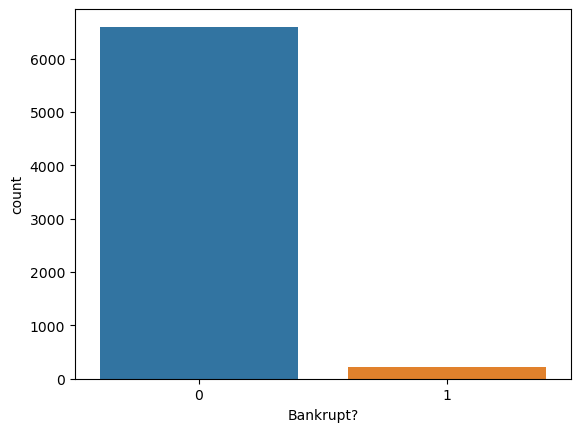

In [24]:
# Histogram of target variable
sns.countplot(x='Bankrupt?', data=data)
plt.show()

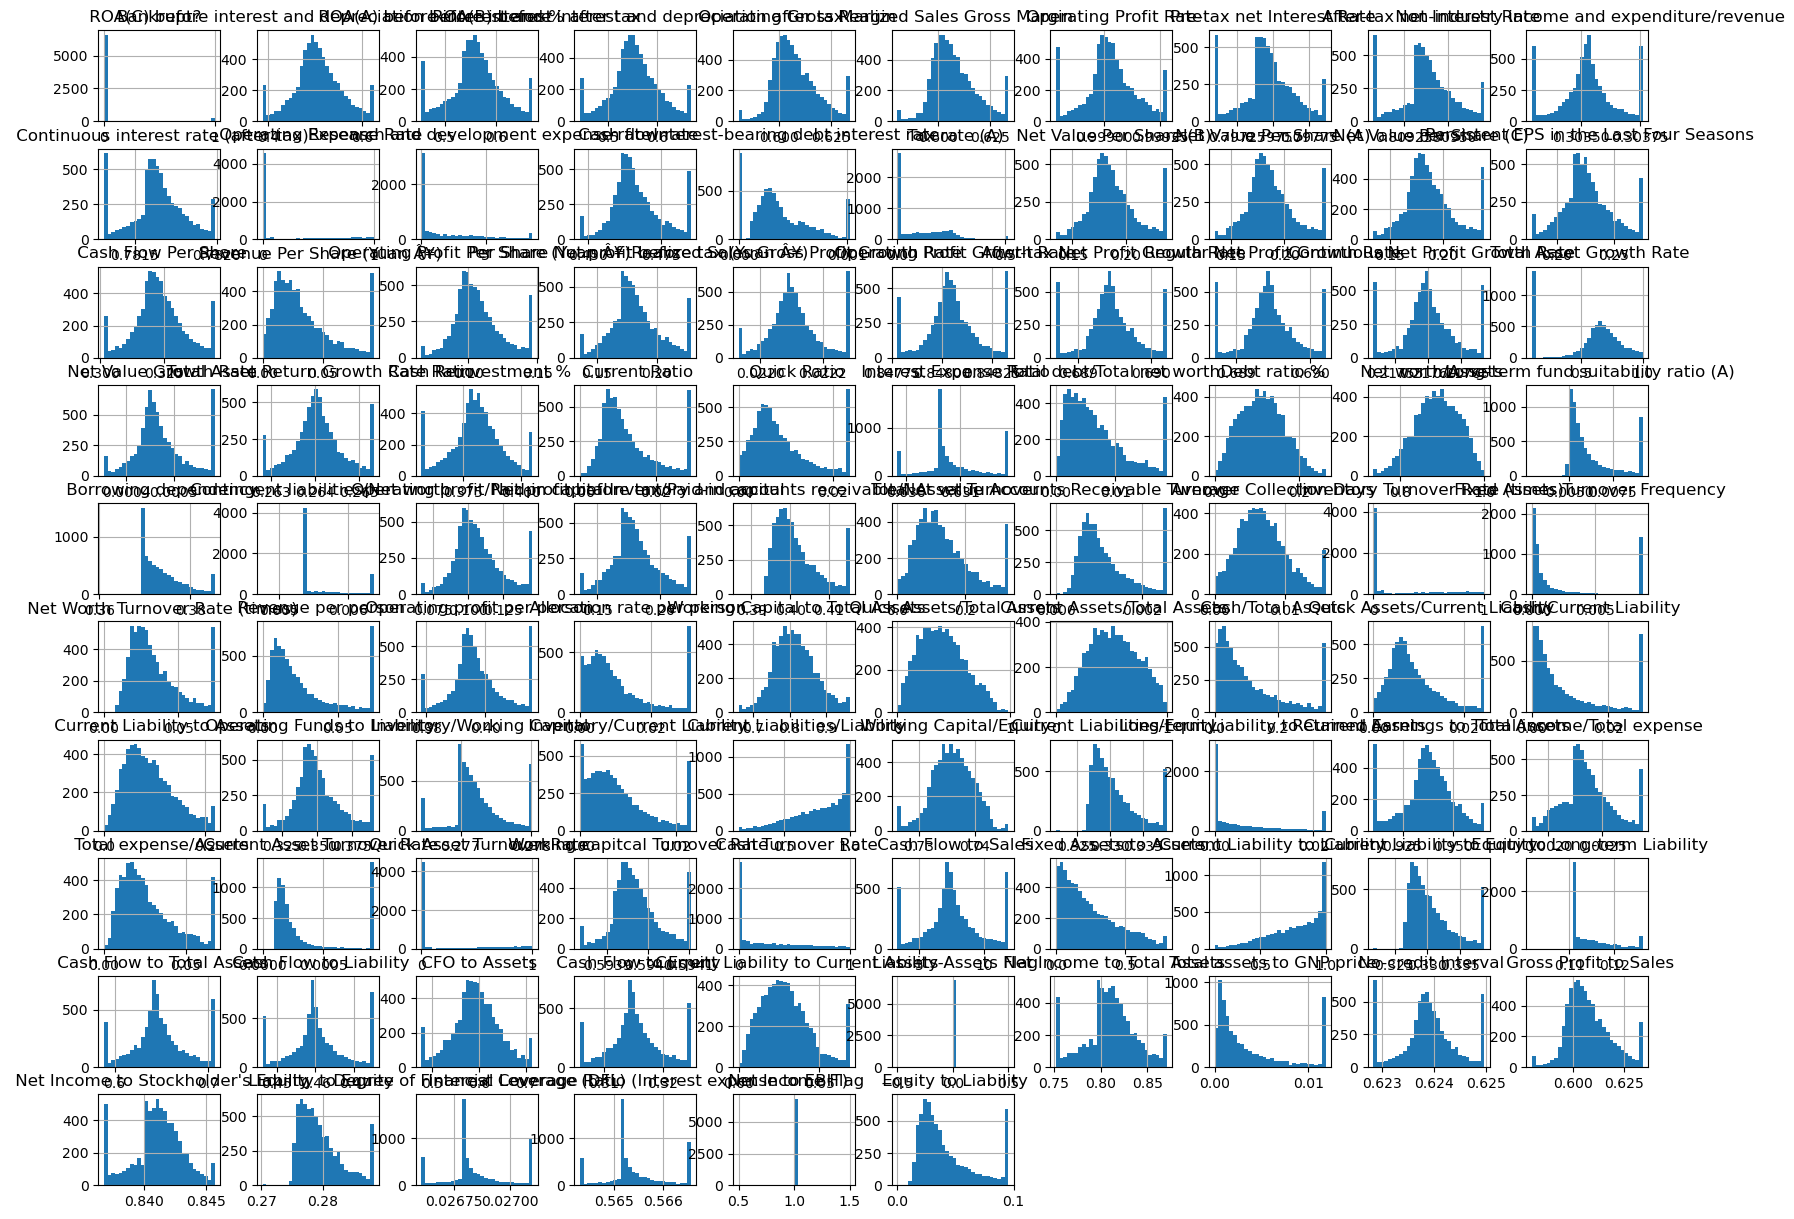

In [23]:
# Histograms for features
data.hist(bins=30, figsize=(20, 15))
plt.show()

# Analyze Relationships Between Features and Target Variable

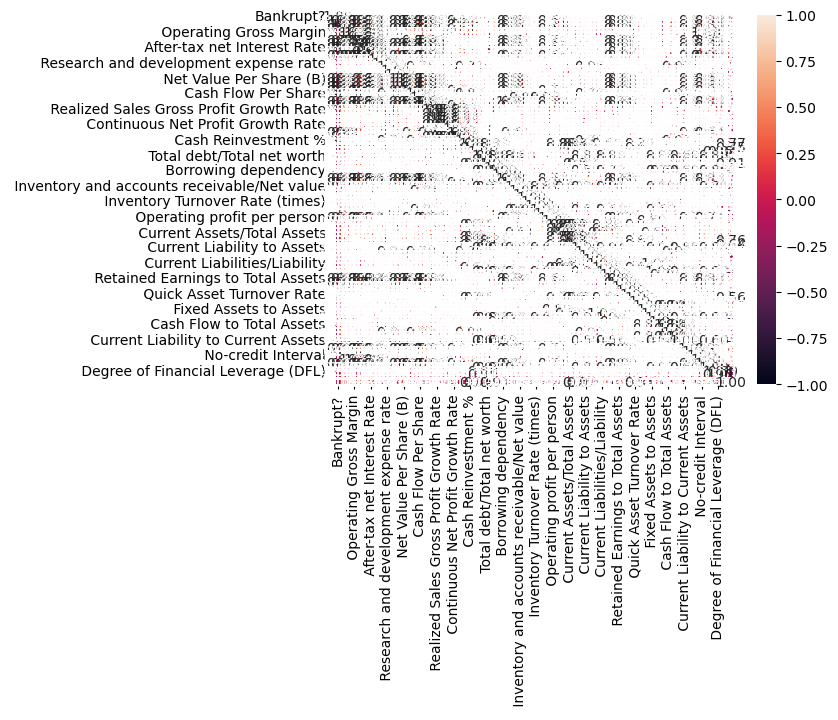

In [25]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Pair plot
sns.pairplot(data, hue='Bankrupt?', diag_kind='kde')
plt.show()

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from scipy.stats import zscore

predictor_columns = data.columns[data.columns != 'Bankrupt?']
z_scores = data[predictor_columns].apply(zscore)
z_scores.head()

In [ ]:
# Extract the correlation of each feature with the target variable
target_correlation = corr_matrix['Bankrupt?'].sort_values(ascending=False)

In [ ]:
# Plot the correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Bankrupt?)')
plt.show()

In [25]:
target_correlation = corr_matrix['Bankrupt?']
(target_correlation).sort_values(ascending=False) #printing correlation of each column with target column 'Bankrupt? '

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [26]:
sorted_correlations = corr_matrix['Bankrupt?'].abs().sort_values(ascending=False)
#used abs to convert negative values into postitve and sort the values in descending order

In [27]:
top_10_columns = sorted_correlations[0:11].index.tolist() #extracting column names of top 10 columns

In [28]:
data = data[top_10_columns] #updating dataframe with top 20 columns

In [29]:
data

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan Â¥)
0,1,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803
3,1,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111,0.172102
6815,0,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805,0.172780
6816,0,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287,0.173232
6817,0,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498,0.185584


In [31]:
data.shape

(6819, 11)

# Perform Hypothesis Testing

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Separate the bankrupt and non-bankrupt groups
bankrupt = data[data['Bankrupt?'] == 1]
non_bankrupt = data[data['Bankrupt?'] == 0]

# Perform ANOVA for each feature
anova_results = {}
for column in data.columns:
    if column != 'Bankrupt?':
        f_val, p_val = f_oneway(bankrupt[column], non_bankrupt[column])
        anova_results[column] = p_val

# Convert the results to a DataFrame
anova_results_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-Value'])

# Identify significant features (e.g., p-value < 0.05)
significant_features = anova_results_df[anova_results_df['P-Value'] < 0.05]

# Display the significant features
significant_features


,Feature,P-Value
0,Net Income to Total Assets,2.533819e-102
1,ROA(A) before interest and % after tax,1.453424e-89
2,ROA(B) before interest and depreciation after...,1.867512e-91
3,ROA(C) before interest and depreciation befor...,1.348046e-89
4,Net worth/Assets,5.893584e-95
5,Debt ratio %,5.893584e-95
6,Persistent EPS in the Last Four Seasons,1.285066e-102
7,Retained Earnings to Total Assets,7.462353e-102
8,Net profit before tax/Paid-in capital,1.104994e-95
9,Per Share Net profit before tax (Yuan Â¥),1.533367e-94


In [36]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
print(coefficients.sort_values(by='Coefficient'))


                                             Feature  Coefficient
4                                   Net worth/Assets    -5.001206
3   ROA(C) before interest and depreciation befor...    -3.978350
1             ROA(A) before interest and % after tax    -3.955248
2   ROA(B) before interest and depreciation after...    -3.944825
0                         Net Income to Total Assets    -2.539574
6            Persistent EPS in the Last Four Seasons    -2.119669
9          Per Share Net profit before tax (Yuan Â¥)    -1.868275
8              Net profit before tax/Paid-in capital    -1.805043
7                  Retained Earnings to Total Assets    -1.291175
5                                       Debt ratio %     5.002420


In [37]:
data.head()

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan Â¥)
0,1,0.752193,0.455122,0.442034,0.387973,0.792424,0.207576,0.178548,0.910524,0.137757,0.138736
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.910524,0.148036,0.142803
3,1,0.752193,0.455122,0.457733,0.399844,0.848535,0.151465,0.193722,0.910524,0.147561,0.148603
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412


# Logistic Regression

In [38]:
data=data.rename(columns={'Bankrupt?':'Bankrupt'})

In [39]:
data.head()

,Bankrupt,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan Â¥)
0,1,0.752193,0.455122,0.442034,0.387973,0.792424,0.207576,0.178548,0.910524,0.137757,0.138736
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.910524,0.148036,0.142803
3,1,0.752193,0.455122,0.457733,0.399844,0.848535,0.151465,0.193722,0.910524,0.147561,0.148603
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('Bankrupt',axis=1),data.Bankrupt,test_size=0.2)

In [41]:
x_train=sm.add_constant(x_train,prepend=False)

In [42]:
x_test=sm.add_constant(x_test,prepend=False)

In [43]:
mod1=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.089532
         Iterations 10


In [44]:
print(mod1.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5445
Method:                           MLE   Df Model:                            9
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3799
Time:                        21:17:01   Log-Likelihood:                -488.40
converged:                       True   LL-Null:                       -787.66
Covariance Type:            nonrobust   LLR p-value:                4.368e-123
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
 Net Income to Total Assets                               -127.5206     23.867     -5.343      0.000    -174.299     -

In [ ]:
#Net Income to total assets has negative correlation with Bankrupt.---> means when net income to total assets ratio increases then probability of 0 drecreases.
#ROA(A) and ROA(B) both has positive correlation with bankrupt i.e. when ROA increases ,then the probability of 1 increases.

In [45]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [46]:
mypred=mod1.predict(x_test)

In [47]:
mypred[:5]

581     0.022639
2835    0.001915
3112    0.038890
3910    0.004056
122     0.003861
dtype: float64

In [48]:
y_pred=[]

In [49]:
for ctr in mypred:
    if ctr>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
print(confusion_matrix(y_test,y_pred))

[[1315    8]
 [  35    6]]


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1323
           1       0.43      0.15      0.22        41

    accuracy                           0.97      1364
   macro avg       0.70      0.57      0.60      1364
weighted avg       0.96      0.97      0.96      1364



# Conclusion

In [ ]:
#Accuracy of our model is 0.97 .
